# BCG - Modeling & Evaluation

In [65]:
import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

### Load the data

In [48]:
train = pd.read_csv('Module4_data.csv')

In [49]:
train.head()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,...,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn,duration,channel_sales_encoded,retention
0,0,54946,0,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,...,25.44,25.44,2,678.99,3,43.648,1,1096,0.106385,3
1,4660,0,0,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,...,16.38,16.38,1,18.89,6,13.800,0,2566,0.106385,7
2,544,0,0,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,...,28.60,28.60,1,6.60,6,13.856,0,2192,0.106385,6
3,1584,0,0,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,...,30.22,30.22,1,25.46,6,13.200,0,2192,0.053712,6
4,121335,0,12400,10865.02,12400,0.0,170.74,0.110083,0.093746,40.606701,...,-3.18,-3.18,1,823.18,6,75.000,0,2192,0.106385,6


In [50]:
X_total = pd.read_csv('X_train_data.csv')

In [51]:
y_total = pd.read_csv('Y_train_data.csv')

In [52]:
print(y_total.shape)
print(X_total.shape)

(173370, 1)
(173370, 26)


In [53]:
# Split the data between the training and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_total, y_total, test_size=0.33, random_state=42)

In [54]:
X_test.head()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,...,num_years_antig,pow_max,duration,channel_sales_encoded,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
62590,2587145,0,324254,3214.28,4067,0.0,16.44,0.162033,0.084138,44.311378,...,6,13.8,2192,0.053712,0.168654,0.085390,0.000000,44.444710,0.000000,0.000000
42434,20000,0,2245,2205.91,2245,0.0,130.32,0.116340,0.099998,40.606701,...,4,25.0,1461,0.106385,0.129444,0.106863,0.075004,40.565969,24.339581,16.226389
114468,6791,0,348,701.74,348,0.0,133.02,0.115174,0.098837,40.606701,...,6,15.1,2557,0.106385,0.118312,0.099632,0.071760,40.728885,24.437330,16.291555
51473,43951,0,0,4338.13,0,0.0,111.84,0.115232,0.100123,40.606701,...,5,47.0,2189,0.106385,0.128069,0.105842,0.073773,40.728885,24.437330,16.291555
152419,2724,0,273,410.83,273,0.0,13.78,0.147506,0.000000,45.806878,...,5,15.0,2192,0.106385,0.152445,0.000000,0.000000,44.266930,0.000000,0.000000


# Decision Trees and Random Forest algorithms

In [59]:
# Test Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

clf = DecisionTreeClassifier(random_state=0).fit(X_train, y_train)
y_pred = clf.predict(X_test)
scores_accuracy = cross_val_score(clf, X_train, y_train, cv=4, scoring='accuracy')
scores_f1 = cross_val_score(clf, X_train, y_train, cv=4, scoring='f1_macro')

# Print the confusion matrix
y_true = y_test
confusion_matrix(y_true, y_pred)

print(scores_accuracy)
print(scores_f1)

[0.99910468 0.99913909 0.99910465 0.99944902]
[0.99745518 0.99754958 0.99745517 0.99843395]


In [60]:
# Metrics for the DecisionTrees
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
print('For the DecisionTrees, we have the following results : \ntn:'+ str(tn) + '  ' + 'fp:'+ str(fp) + '  '+'fn:'+ str(fn) + ' tp:'+ str(tp) + ' , meanwhile the accuracy is ' + " " + str(accuracy_score(y_true, y_pred)))
print('The F1 score is ' + str(f1_score(y_true, y_pred, average='macro')))

For the DecisionTrees, we have the following results : 
tn:51690  fp:14  fn:17 tp:5492 , meanwhile the accuracy is  0.9994581651023369
The F1 score is 0.998442940619131


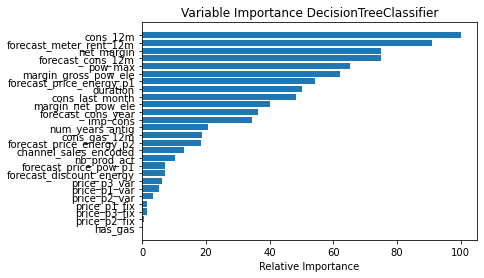

In [96]:
def plot_importance(model):
    """
    Fuction to plot variable importance from machine learning model.
    Note: the model requires to have "model.feature_importances_".
   
    Inputs
    -------
    - model: a model with a object ".feature_importances_"

    Returns
    -------
    - feature importance plot
   

    """

    feature_importance = model.feature_importances_
    # make importances relative to max importance
    feature_importance = 100.0 * (feature_importance / feature_importance.max())
    sorted_idx = np.argsort(feature_importance)
    pos = np.arange(sorted_idx.shape[0]) + .5
    plt.barh(pos, feature_importance[sorted_idx], align='center')
    plt.yticks(pos, X_train.columns[sorted_idx])
    plt.xlabel('Relative Importance')
    plt.title(f'Variable Importance {model.__class__.__name__}')
    plt.show()

plot_importance(clf)

In the feature importance graph above we can see that cons_12m and net_margin are the features that appear the most in our model and we could infere that these two features have a significant importnace in our model.

## Logistic Regression Model
Since the Logistic regression model had a good effectiveness (90%), we are going to use this algorithm for further study.

In [69]:
train_columns = train.columns.values.tolist()
train_columns

['cons_12m',
 'cons_gas_12m',
 'cons_last_month',
 'forecast_cons_12m',
 'forecast_cons_year',
 'forecast_discount_energy',
 'forecast_meter_rent_12m',
 'forecast_price_energy_p1',
 'forecast_price_energy_p2',
 'forecast_price_pow_p1',
 'imp_cons',
 'margin_gross_pow_ele',
 'margin_net_pow_ele',
 'nb_prod_act',
 'net_margin',
 'num_years_antig',
 'pow_max',
 'churn',
 'duration',
 'channel_sales_encoded',
 'retention']

In [70]:
Y = ['churn']
X = [v for v in train_columns if v not in Y]
X

['cons_12m',
 'cons_gas_12m',
 'cons_last_month',
 'forecast_cons_12m',
 'forecast_cons_year',
 'forecast_discount_energy',
 'forecast_meter_rent_12m',
 'forecast_price_energy_p1',
 'forecast_price_energy_p2',
 'forecast_price_pow_p1',
 'imp_cons',
 'margin_gross_pow_ele',
 'margin_net_pow_ele',
 'nb_prod_act',
 'net_margin',
 'num_years_antig',
 'pow_max',
 'duration',
 'channel_sales_encoded',
 'retention']

### Model Feature Selection
This time we are choosing the 12 best features for our model.

In [71]:
n = 12 #Features

In [72]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [73]:
lr = LogisticRegression()

In [74]:
rfe = RFE(lr, n_features_to_select=10)
rfe = rfe.fit(train[X], train[Y].values.ravel())

C:\Users\Alejandro Cerrilla\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Alejandro Cerrilla\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

In [75]:
print(rfe.support_)

[False False False False False False  True False False  True  True False
  True  True  True  True  True  True False  True]


In [76]:
print(rfe.ranking_)

[ 6  5 11  4  3  9  1  7 10  1  1  2  1  1  1  1  1  1  8  1]


In [77]:
z = zip(X,rfe.support_,rfe.ranking_)

In [78]:
list(z)

[('cons_12m', False, 6),
 ('cons_gas_12m', False, 5),
 ('cons_last_month', False, 11),
 ('forecast_cons_12m', False, 4),
 ('forecast_cons_year', False, 3),
 ('forecast_discount_energy', False, 9),
 ('forecast_meter_rent_12m', True, 1),
 ('forecast_price_energy_p1', False, 7),
 ('forecast_price_energy_p2', False, 10),
 ('forecast_price_pow_p1', True, 1),
 ('imp_cons', True, 1),
 ('margin_gross_pow_ele', False, 2),
 ('margin_net_pow_ele', True, 1),
 ('nb_prod_act', True, 1),
 ('net_margin', True, 1),
 ('num_years_antig', True, 1),
 ('pow_max', True, 1),
 ('duration', True, 1),
 ('channel_sales_encoded', False, 8),
 ('retention', True, 1)]

In [79]:
cols = ['forecast_discount_energy','forecast_meter_rent_12m','forecast_price_energy_p1','forecast_price_pow_p1','imp_cons','margin_gross_pow_ele','margin_net_pow_ele','nb_prod_act','net_margin','num_years_antig','pow_max','duration']

In [80]:
X = train[cols]
Y = train["churn"]

### Model Implementation with statsmodels.api

In [81]:
import statsmodels.api as sm

In [82]:
logit_model = sm.Logit(Y, X) #(Y = Variable to predict, X = Predictive Variables)

In [83]:
result = logit_model.fit()

         Current function value: 0.308999
         Iterations: 35


C:\Users\Alejandro Cerrilla\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1799: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\Users\Alejandro Cerrilla\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [84]:
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                                Results: Logit
===============================================================================
Model:                    Logit                Pseudo R-squared:     0.031     
Dependent Variable:       churn                AIC:                  8959.6414 
Date:                     2021-10-31 18:09     BIC:                  9050.5902 
No. Observations:         14459                Log-Likelihood:       -4467.8   
Df Model:                 11                   LL-Null:              -4612.1   
Df Residuals:             14447                LLR p-value:          2.2713e-55
Converged:                0.0000               Scale:                1.0000    
No. Iterations:           35.0000                                              
-------------------------------------------------------------------------------
                          Coef.    Std.Err.    z    P>|z|    [0.025     0.975] 
-------------------------------------------------------------------------------
forecast_discount_energy   0.4426    0.1551  2.8547 0.0043     0.1387    0.7465
forecast_meter_rent_12m   -0.0017    0.0007 -2.3760 0.0175    -0.0031   -0.0003
forecast_price_energy_p1 -17.0604    2.2447 -7.6004 0.0000   -21.4598  -12.6609
forecast_price_pow_p1      0.0136    0.0074  1.8569 0.0633    -0.0008    0.0281
imp_cons                  -0.0003    0.0002 -1.7780 0.0754    -0.0006    0.0000
margin_gross_pow_ele     -15.2364 2079.9098 -0.0073 0.9942 -4091.7848 4061.3119
margin_net_pow_ele        15.2674 2079.9098  0.0073 0.9941 -4061.2810 4091.8158
nb_prod_act               -0.1469    0.0496 -2.9616 0.0031    -0.2441   -0.0497
net_margin                 0.0012    0.0002  5.9274 0.0000     0.0008    0.0016
num_years_antig           -0.3343    0.0637 -5.2502 0.0000    -0.4590   -0.2095
pow_max                   -0.0275    0.0046 -5.9519 0.0000    -0.0366   -0.0184
duration                   0.0005    0.0002  2.9564 0.0031     0.0002    0.0008
===============================================================================

"""

Also we´ve discovered that the Net Margin on power subscription is a great feature for our column since it has a positive coeficient on the impact of the churn.